In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.datasets import fetch_lfw_people
from collections import Counter
from sklearn.svm import SVC, SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.set_theme()

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images.shape

(1140, 125, 125)

In [7]:
faces.images = faces.images[:, 35:97, 39:86]
faces.images.shape

(1140, 62, 47)

In [8]:
# reshape from 3D (n,h,w) to 2D (n,hxw)
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])
faces.data.shape

(1140, 2914)

In [9]:
faces.target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

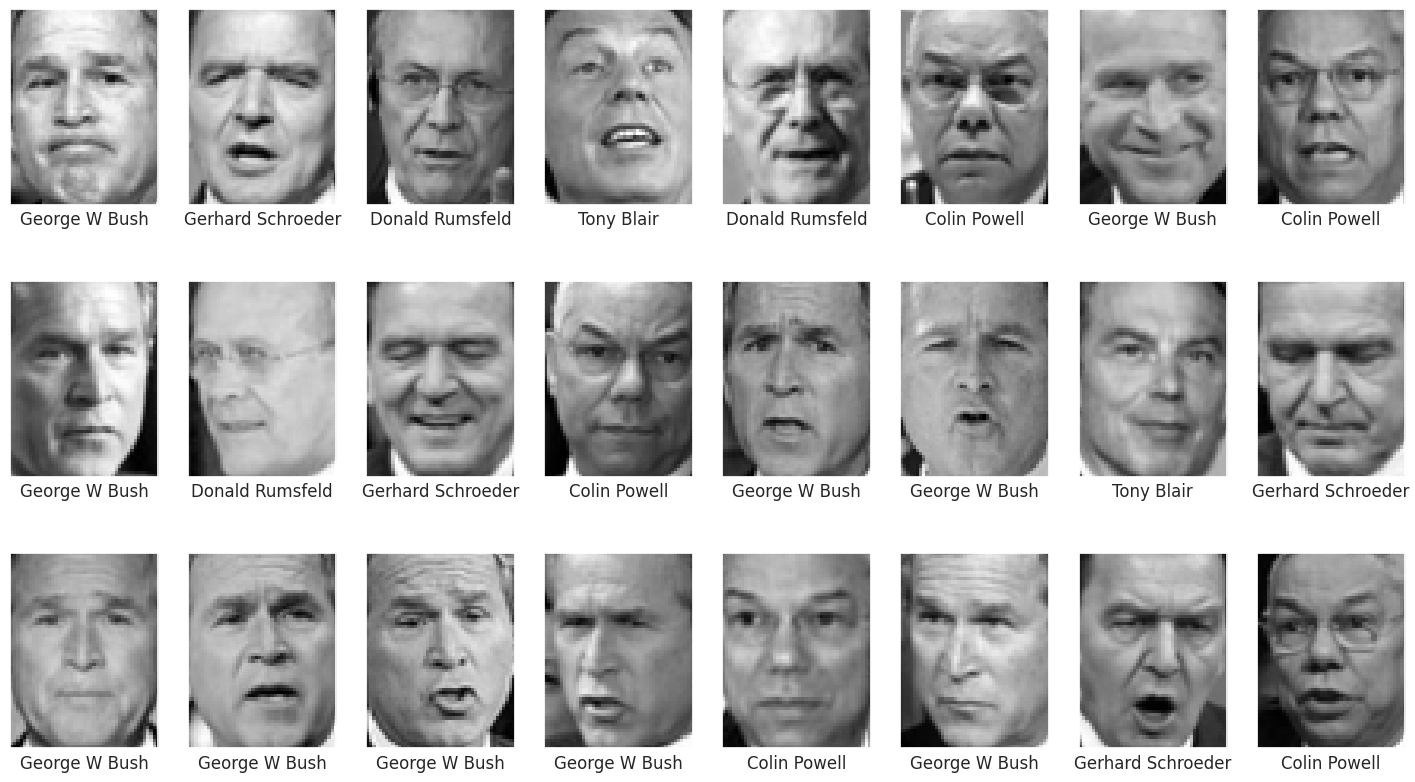

In [12]:
# show first 24 images
%matplotlib inline

fig, ax = plt.subplots(3,8, figsize=(18,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])


In [15]:
faces.target.shape

(1140,)

### visualize class balance

<Axes: >

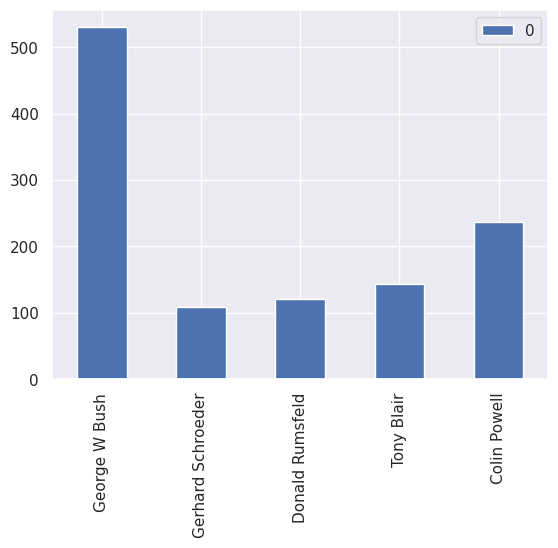

In [22]:
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient="index")
df.plot(kind="bar")


In [27]:
mask = np.zeros(faces.target.shape, dtype=bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x = faces.data[mask]
y = faces.target[mask]

x.shape

(500, 2914)

### Using GridSearchCV with linear kernel and no scaler

In [29]:
svc =SVC(kernel="linear")
grid = {
    'C' : [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=svc, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ................................................C=1; total time=   0.2s
[CV] END ...............................................C=10; total time=   0.2s
[CV] END ........................................

0.842

### Using a StandardScaler

In [31]:
scaler = StandardScaler()
svc = SVC(kernel="linear")
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C' : [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END .........................................svc__C=0.1; total time=   0.3s
[CV] END .........................................svc__C=0.1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.2s
[CV] END ...........................................svc__C=1; total time=   0.4s
[CV] END ...........................................svc__C=1; total time=   0.3s
[CV] END ..........................................svc__C=10; total time=   0.3s
[CV] END ........................................

0.8560000000000001

In [33]:
grid_search.best_params_

{'svc__C': 0.1}

### Using a polynomial kernel

In [34]:
svc = SVC(kernel="poly")
scaler = StandardScaler()
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C' : [0.1, 1, 10, 100],
    'svc__gamma' : [0.01, 0.25, 0.5, 0.75, 1],
    'svc__degree' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.01; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END .........svc__C=0.1, svc__degree=1, svc__gamma=0.25; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=1, svc__gamma=0.5; total time=   0.2s
[CV] END ..........svc__C=0.1, svc__degree=1, 

0.8560000000000001

In [35]:
grid_search.best_params_

{'svc__C': 0.1, 'svc__degree': 1, 'svc__gamma': 0.25}

### Using and RBF kernel

In [37]:
scaler = StandardScaler()
svc = SVC(kernel="rbf")
pipe = make_pipeline(scaler, svc)

grid = {
    'svc__C' : [0.1, 1, 10, 100],
    'svc__gamma' : [0.01, 0.25, 0.5, 0.75, 1.0]
}

grid_search = GridSearchCV(estimator=pipe, param_grid=grid, cv=5, verbose=2)
grid_search.fit(x,y)
grid_search.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.01; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.4s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END ........................svc__C=0.1, svc__gamma=0.25; total time=   0.3s
[CV] END .........................svc__C=0.1, svc__gamma=0.5; total time=   0.3s
[CV] END .........................svc__C=0.1, s

0.47400000000000003

In [38]:
grid_search.best_params_

{'svc__C': 1, 'svc__gamma': 0.25}

### Visualizing with a Confusion Matrix

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

In [41]:
x_train.shape

(400, 2914)

In [43]:
scaler = StandardScaler()
svc = SVC(kernel="linear", C=0.1)
pipe = make_pipeline(scaler, svc)
pipe.fit(x_train, y_train)

cross_val_score(pipe, x, y, cv=5).mean()

0.8560000000000001

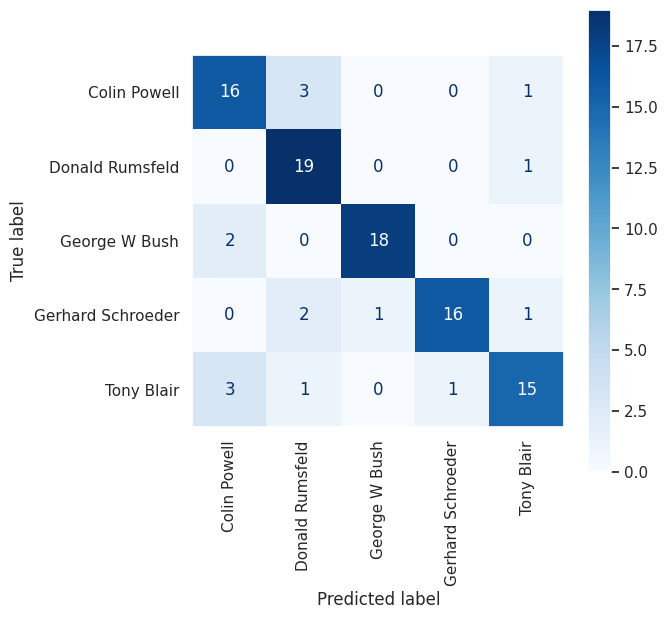

In [45]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)

cmd.from_estimator(pipe, x_test, y_test, display_labels=faces.target_names, cmap="Blues", xticks_rotation="vertical", ax=ax)